In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
scooters_info = pd.read_csv('scooters_with_density.csv')
scooters_info.head(5)

,scooter_id,xcoordinate,ycoordinate,power_level,density,avg_power_lv,charging_time
0,0,0.906835,0.776484,0,1371,2.453683,5
1,1,0.928587,0.804964,2,1314,2.454338,3
2,2,0.904091,0.784043,1,1335,2.456929,4
3,3,0.906752,0.804461,0,1314,2.459665,5
4,4,0.900641,0.781683,4,1323,2.458806,1


### Besides having a good charging stratergy, I suggest that we work on setting up charging stations at the densest point of each cluster, which can seriously lighten the load for the bus. 

,scooter_id,xcoordinate,ycoordinate,power_level,density,avg_power_lv,charging_time
1070,1070,0.932272,0.772558,4,2357,2.490454,1
4966,4966,0.218215,0.139055,5,2205,2.526984,0
4413,4413,0.234577,0.126047,4,2205,2.526984,1
4396,4396,0.224493,0.144357,2,2205,2.526984,3
4399,4399,0.214304,0.130103,2,2205,2.526984,3


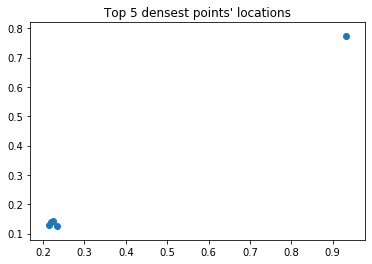

In [3]:
top_5_densest_points = scooters_info.sort_values('density', ascending = False).head(5)

plt.scatter(top_5_densest_points.xcoordinate, top_5_densest_points.ycoordinate)
plt.title("Top 5 densest points' locations")

top_5_densest_points

###### Comment:
If we just simply sort by density, what come on top are actually points that belong to the same cluster. Yet, what we want is the (singular) densest point of each cluster.

We can do that by turning our space/coordinate system into a grid system and select only the densest point of each square.  

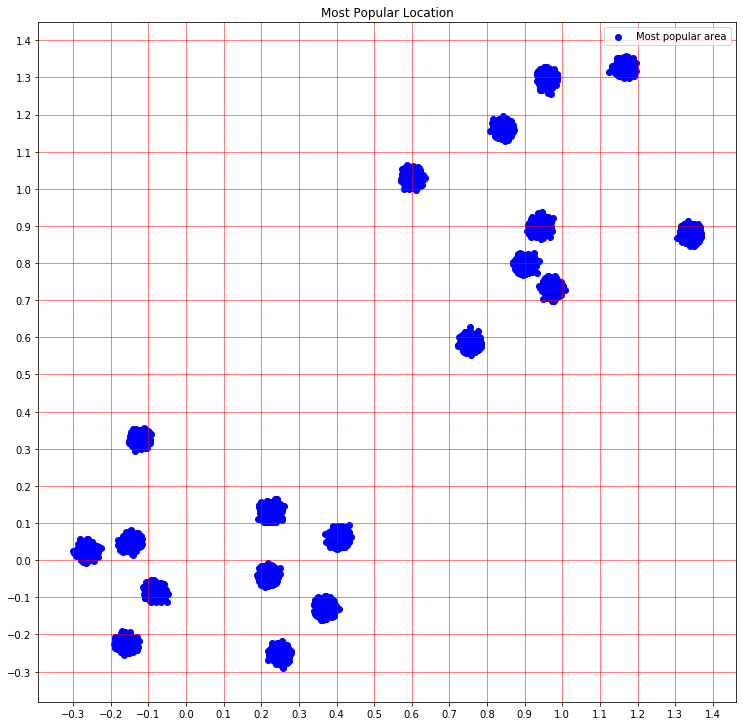

In [4]:
def plot_densest_points(densest_points_df = pd.DataFrame(), plot_size = (12.5, 12.5)): 
    #if densest_points_df is not given, its default is an empty dataframe
    
    plt.figure(figsize = plot_size)
    
    #create an axis scale that starts at -0.4, ends at 1.4, the step is 0.1 >> there're 19 ticks:
    axis_scale = np.round(np.linspace(-0.4, 1.4, 19), 1)

    plt.xticks(axis_scale)
    plt.yticks(axis_scale)

    plt.scatter(scooters_info['xcoordinate'], scooters_info['ycoordinate'], color = 'blue')

    plt.grid(linewidth = 0.5, color = 'r')

    #plot the densest points:
    for index, point in densest_points_df.iterrows():
        densest_point = plt.Circle((point.xcoordinate, point.ycoordinate), 
                                    radius=0.05, alpha = 0.5, color = 'y')
        plt.gca().add_patch(densest_point)

    plt.legend(['Most popular area'])
    
    #

    plt.title("Most Popular Location")
    
plot_densest_points()

Here, each square has a width of 0.1 >>> to identify which point belongs to which square, we can round down the x-coordinate and the y-coordinate to one decimal place. For example, a point with a xcoordinate of 0.3712 belongs to the square that starts at 0.3 (and ends at 0.4). A point with a xcoordinate of 0.4138 belongs to the square that starts at 0.4  

In [5]:
print("Number:", 0.3712)

print("Just the round function: ", np.round(0.3712, 1)) # it rounds up 

print("Just the floor function: ", np.floor(3.712)) #it rounds down to the first integer

print("Customized floor: ", np.floor(0.3712*10)/10) 
#multiplying the number by 10 (shift the decimal point one place to the right)
#floor it
#shift the decimal point back by dividing it by 10

Number: 0.3712
Just the round function:  0.4
Just the floor function:  3.0
Customized floor:  0.3


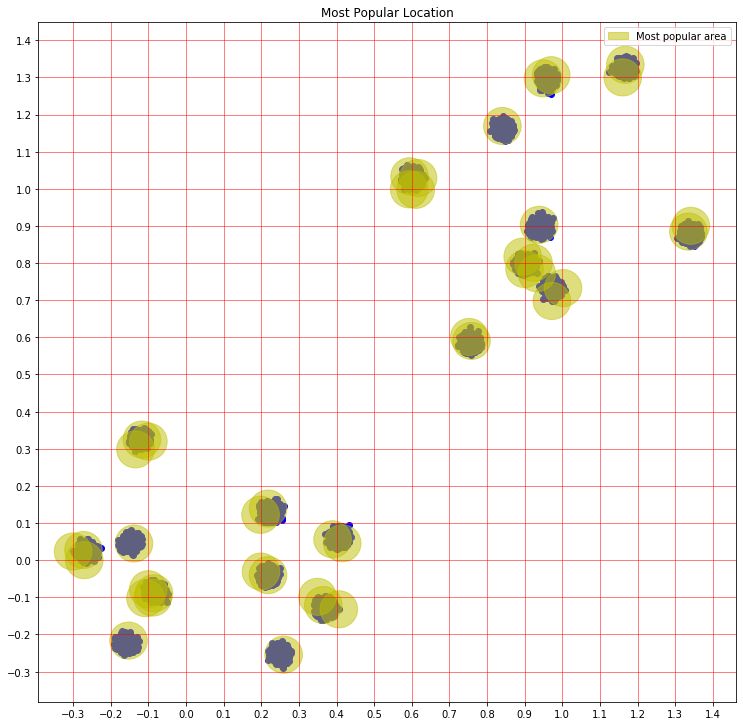

In [6]:
densest_points = scooters_info.copy()

densest_points.sort_values('density', ascending = False, inplace = True) 

#identify which square each point belongs to:
densest_points['xgrid'] = np.floor(densest_points.xcoordinate*10)/10
densest_points['ygrid'] = np.floor(densest_points.ycoordinate*10)/10

#drop the points that belong to the same square, only keep the first, which is the one with the highest density
densest_points.drop_duplicates(subset = ['xgrid', 'ygrid'], keep = 'first', inplace = True)

plot_densest_points(densest_points)

###### Comment :
There're still some overlapping points because some clusters are "split" among the squares. How about shifting the points a little bit to make them fit into the squares?

In [7]:
def fit_grid(x_shift = 0, y_shift = 0):
    densest_points.sort_values('density', ascending = False, inplace = True)
    
    densest_points['xgrid'] = np.floor((densest_points.xcoordinate+x_shift)*10)/10
    densest_points['ygrid'] = np.floor((densest_points.ycoordinate+y_shift)*10)/10
    
    densest_points.drop_duplicates(subset = ['xgrid', 'ygrid'], keep = 'first', inplace = True)
    
#We don't actually shift the points because the xcoordinate and ycoordinate columns are not really changed
#We only shift the x-coordinate and the y-coordinate when calculating the xgrid and ygrid

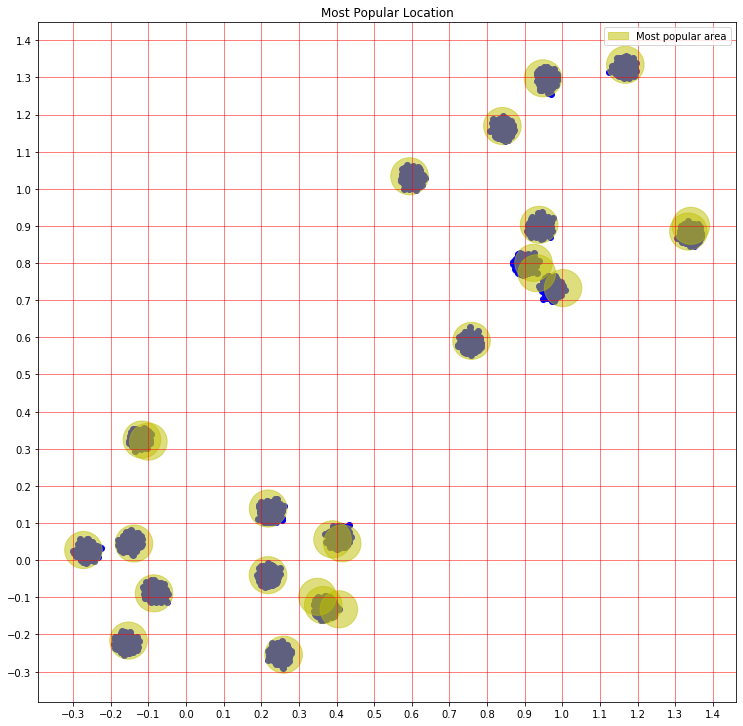

In [8]:
fit_grid(x_shift = 0.01, y_shift = 0.01) 
#shift to the right by 0.01 and up by 0.01 

plot_densest_points(densest_points)

,scooter_id,xcoordinate,ycoordinate,power_level,density,avg_power_lv,charging_time,xgrid,ygrid
1070,1070,0.932272,0.772558,4,2357,2.490454,1,0.9,0.7
4966,4966,0.218215,0.139055,5,2205,2.526984,0,0.2,0.1
14733,14733,0.217944,-0.040321,5,1603,2.485340,0,0.2,-0.1
7714,7714,0.389553,0.056275,0,1558,2.534660,5,0.3,0.0
7780,7780,0.415151,0.045462,4,1558,2.534660,1,0.4,0.0
9834,9834,1.335092,0.884786,1,1517,2.507581,4,1.3,0.8
19174,19174,0.840788,1.169119,3,1491,2.443997,2,0.8,1.1
6864,6864,0.758816,0.590532,4,1461,2.426420,1,0.7,0.5
1700,1700,-0.084912,-0.089201,3,1367,2.417703,2,-0.1,-0.1
25231,25231,0.948802,1.297394,4,1366,2.529283,1,0.9,1.2


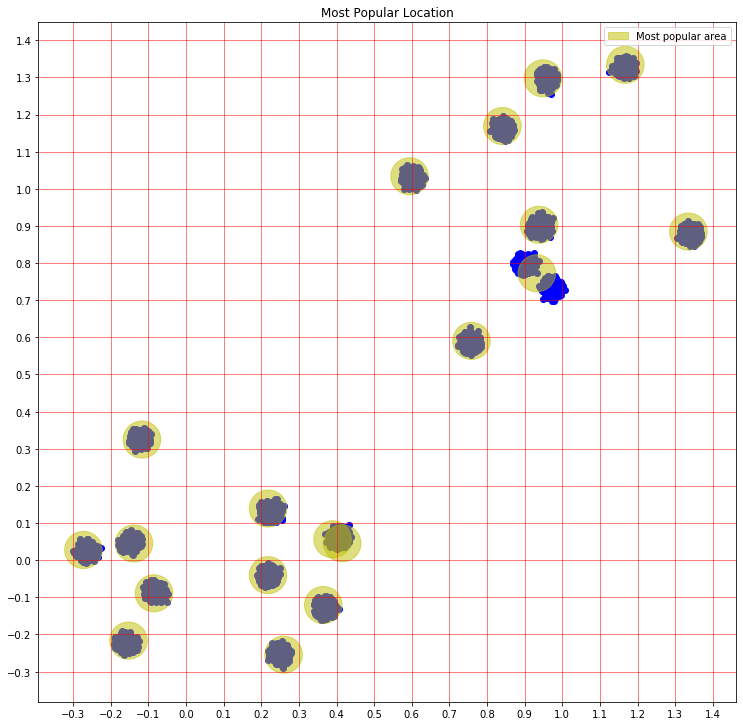

In [9]:
fit_grid(x_shift = -0.01, y_shift = -0.01) 
#shift to the left by 0.01 and down by 0.01 

plot_densest_points(densest_points)

densest_points

###### Comment: 
This looks sensible now.